In [71]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('Combined_News_DJIA.csv')
train = df[df['Date']<'20150101']
test = df[df['Date'] > '20141231']
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data.columns = new_Index
for index in new_Index:
    data[index] = data[index].str.lower()
headlines = []
for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
countVector = CountVectorizer(ngram_range=(2,2))
trainDataset = countVector.fit_transform(headlines)
testTransform =[]
for row in range(0, len(test.index)):
    testTransform.append(' '.join(str(x) for x in test.iloc[row, 2:27]))
test_dataset = countVector.transform(testTransform)

In [76]:
import pickle
randomClassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomClassifier.fit(trainDataset, train['Label'])
randomClassifier.score(test_dataset, test['Label'])
with open('D:\\rf_b.pkl','wb') as f:
    pickle.dump(randomClassifier,f)

In [73]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(trainDataset, train.Label)
clf.score(test_dataset, test['Label'])

0.8518518518518519

In [74]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(trainDataset, train['Label'])
naive.score(test_dataset, test['Label'])

0.8465608465608465

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(trainDataset, train['Label'])
clf1.score(test_dataset, test['Label'])

0.7433862433862434

<BarContainer object of 4 artists>

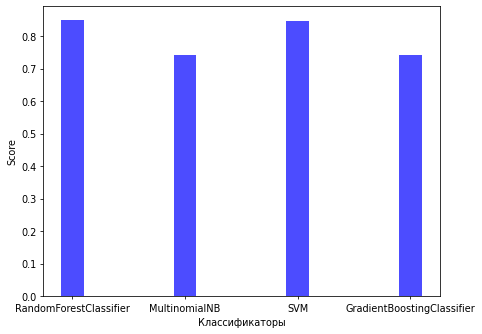

In [104]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
dpi = 70
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})
X = ['RandomForestClassifier', 'MultinomialNB', 'SVM', 'GradientBoostingClassifier']
y = [randomClassifier.score(test_dataset, test['Label']), clf.score(test_dataset, test['Label']), naive.score(test_dataset, test['Label']), clf1.score(test_dataset, test['Label'])]
plt.xlabel('Классификаторы')
plt.ylabel('Score')
plt.bar(x = X, height=y, width = 0.2, color = 'blue', alpha = 0.7, zorder = 2)

In [86]:
def pred_cl(df):
    data = df.iloc[:, 2:27]
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    list1 = [i for i in range(25)]
    new_Index = [str(i) for i in list1]
    data.columns = new_Index
    for index in new_Index:
        data[index] = data[index].str.lower()
    headlines = []
    for row in range(0, len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
    Dataset = countVector.transform(headlines)
    return Dataset
predictor_df = pred_cl(df)
with open('D:\\rf_b.pkl', 'rb') as f:
    randomClassifier = pickle.load(f)
    ch = randomClassifier.predict(predictor_df)

In [87]:
dfff = pd.read_csv('upload_DJIA_table.csv')
dfff['Delta'] = dfff.Open - dfff.Close
dff = pd.DataFrame({'Date':df.Date, 'Label':ch, 'Delta':dfff.Delta})
dff

,Date,Label,Delta
0,2008-08-08,0,-25.128907
1,2008-08-11,1,-217.230468
2,2008-08-12,0,-238.660157
3,2008-08-13,0,-219.210937
4,2008-08-14,1,214.970704
...,...,...,...
1984,2016-06-27,1,-83.859376
1985,2016-06-28,1,99.849609
1986,2016-06-29,1,139.230468
1987,2016-06-30,1,-52.679687


In [90]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

def ne_ch():
    df = pd.read_csv('upload_DJIA_table.csv')
    df2 = pd.read_csv('Combined_News_DJIA.csv')
    df2['Delta'] = df.Open - df.Close
    dff = pd.DataFrame({'Date':df2.Date, 'Label':df2.Label, 'Delta':df2.Delta})
    xs12 = dff[(dff.Date > "2008-08-08") & (dff.Date < "2016-07-01")].Date
    ys12 = dff[(dff.Date > "2008-08-08")  & (dff.Date < "2016-07-01")].Delta

    tryw = pd.DataFrame(np.array(ys12), index=range(len(xs12)))
    model = SARIMAX(tryw)
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(0, len(ys12))
    model_fit.aic,len(yhat)

    #df12 = pd.read_csv('Combined_News_DJIA.csv')
    train = df2[df2['Date']<'20150101']
    test = df2[df2['Date'] > '20141231']
    data = train.iloc[:, 2:27]
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    list1 = [i for i in range(25)]
    new_Index = [str(i) for i in list1]
    data.columns = new_Index
    for index in new_Index:
        data[index] = data[index].str.lower()
    headlines = []
    for row in range(0, len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
    countVector = CountVectorizer(ngram_range=(2,2))
    trainDataset = countVector.fit_transform(headlines)
    def pred_cl(df):
        data = df.iloc[:, 2:27]
        data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
        list1 = [i for i in range(25)]
        new_Index = [str(i) for i in list1]
        data.columns = new_Index
        for index in new_Index:
            data[index] = data[index].str.lower()
        headlines = []
        for row in range(0, len(data.index)):
            headlines.append(' '.join(str(x) for x in data.iloc[row, 0:25]))
        Dataset = countVector.transform(headlines)
        return Dataset
    predictor_df = pred_cl(df2)
    with open('D:\\rf_b.pkl', 'rb') as f:
        randomClassifier = pickle.load(f)
        ch = randomClassifier.predict(predictor_df)
    lb = ch
    b = []
    for i in range(0, len(yhat)):
        if lb[i] == 0 and yhat[i] < 0:
            a = yhat[i]*(-1)
            b.append(a)
        elif lb[i] == 1 and yhat[i] > 0:
            a = yhat[i]*(-1)
            b.append(a)
        else:
            a = yhat[i]
            b.append(a)
    dr = pd.DataFrame({'Date':df2.Date[:-1], 'Label':ch[:-1], 'Delta':b})
    modif_dr = dr[['Date', 'Delta']]
    return dr
ne_ch()

,Date,Label,Delta
0,2008-08-08,0,0.000000
1,2008-08-11,1,-16.548046
2,2008-08-12,0,18.180504
3,2008-08-13,0,16.698913
4,2008-08-14,1,-16.375903
...,...,...,...
1983,2016-06-24,1,-3.709109
1984,2016-06-27,1,-6.388187
1985,2016-06-28,1,-7.606281
1986,2016-06-29,1,-10.606211
